In [46]:
import pandas as pd
#Load the dataset
df = pd.read_csv(
    "https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv"
)


In [47]:
#Information about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31694 entries, 0 to 31693
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TRIP_START_TIMESTAMP    31694 non-null  object 
 1   TRIP_END_TIMESTAMP      31694 non-null  object 
 2   TRIP_START_HOUR         31694 non-null  float64
 3   TRIP_SECONDS            31694 non-null  int64  
 4   TRIP_MILES              31694 non-null  float64
 5   TRIP_SPEED              31694 non-null  float64
 6   PICKUP_CENSUS_TRACT     13259 non-null  float64
 7   DROPOFF_CENSUS_TRACT    14023 non-null  float64
 8   PICKUP_COMMUNITY_AREA   28477 non-null  float64
 9   DROPOFF_COMMUNITY_AREA  28199 non-null  float64
 10  FARE                    31694 non-null  float64
 11  TIPS                    31694 non-null  float64
 12  TIP_RATE                31694 non-null  float64
 13  TOLLS                   31694 non-null  float64
 14  EXTRAS                  31694 non-null

In [48]:
#Taking Only the Neccesary Columns
df = df[["TRIP_MILES", "TRIP_SECONDS", "FARE"]]

#Droping the null values
df = df.dropna()

#Features and the target
X = df[["TRIP_MILES","TRIP_SECONDS"]].values
Y = df["FARE"].values

In [49]:
from sklearn.model_selection import train_test_split

#Spliting the dataset for the Training and testing
X_train, X_test, Y_train, Y_test = train_test_split(

    X, Y, test_size=0.2, random_state=42

    )

# scaling the features using standard Normalization also known as Z-Score Normalization

mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_Train_scaled = (X_train - mean) / std
X_Test_scaled = (X_test - mean) / std

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(1, input_shape=(X_Train_scaled.shape[1],))
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
model.compile(
    optimizer="adam",# Uses Gradinet Descent for the optimization
    loss="mse" # Penalize Model with the MSE error
)


In [52]:
history = model.fit(
    X_Train_scaled,
    Y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 908.0854 - val_loss: 900.8931
Epoch 2/50
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 841.8206 - val_loss: 835.4971
Epoch 3/50
634/634 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 777.1268 - val_loss: 773.8013
Epoch 4/50
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 736.5612 - val_loss: 715.9576
Epoch 5/50
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 665.6545 - val_loss: 661.2383
Epoch 6/50
634/634 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 611.9186 - val_loss: 609.9819
Epoch 7/50
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 575.9786 - val_loss: 561.8801
Epoch 8/50
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 518.1340 - val_loss: 516.6885
Epoch 9/50
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 487.6604 - val_loss: 474.3940
Epoch 10/50
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 439.8307 - val_loss: 435.0875
Epoch 11/50
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 406.2147 - val_loss: 398.6368
Epoch 12

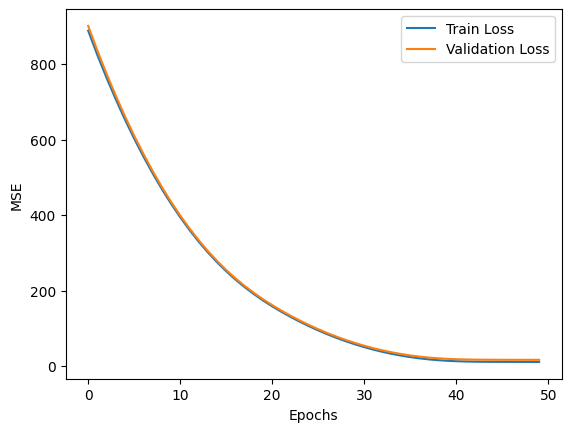

In [53]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()


In [54]:
test_mse = model.evaluate(X_Test_scaled, Y_test)
print("Test MSE:", test_mse)


199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 12.6403
Test MSE: 13.075236320495605


In [55]:
import numpy as np

new_trip = np.array([[5.0, 600]])
new_trip_scaled = (new_trip - mean) / std

fare_pred = model.predict(new_trip_scaled)
print("Predicted fare:", fare_pred[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicted fare: 15.299011


In [56]:
weights, bias = model.layers[0].get_weights()
print("Weights:", weights.flatten())
print("Bias:", bias)


Weights: [14.276472   2.7295012]
Bias: [23.904991]
